<a href="https://colab.research.google.com/github/andrebelem/geemap-tools/blob/main/Exemplo_geemap_tools_%5BCOLAB_version%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# geemap-tools: Demonstra√ß√£o de Funcionalidades

Autor: [Andre L. Belem](mailto:andrebelem@id.uff.br)<br>
Vers√£o: Abril 2025

Este notebook apresenta exemplos pr√°ticos das principais fun√ß√µes dispon√≠veis no pacote `geemap-tools`. As rotinas foram desenvolvidas para facilitar o uso do Google Earth Engine com o aux√≠lio das bibliotecas `geemap` e `eemont`, focando especialmente em usu√°rios que desejam realizar an√°lises geoespaciais sem a necessidade de programar em Python avan√ßado.

#### Instala√ß√£o das Depend√™ncias

Se estiver no Google Colab, instale as depend√™ncias necess√°rias com:

```python
!pip install -U eemont geemap git+https://github.com/andrebelem/geemap-tools.git


In [1]:
%%capture
!pip install -U eemont git+https://github.com/andrebelem/geemap-tools.git # fazendo a instala√ß√£o em sil√™ncio !

Depois disso, basta come√ßar como de costume inicializando o `ee` e o `geemap`.

In [2]:
import ee
import geemap
import geemap_tools as gee

ee.Authenticate()
ee.Initialize(project='ee-andrebelem') # << note que vc tem que mudar para o seu projeto

### Lendo e Gravando uma Regi√£o de Interesse (ROI)

Neste pacote, voc√™ pode definir sua Regi√£o de Interesse (ROI) de duas maneiras:  
- Diretamente por c√≥digo, se j√° souber as coordenadas ou √°rea desejada.
- De forma interativa, desenhando sobre o mapa.

Aqui voc√™ pode usar duas fun√ß√µes uteis: `roi_to_file` e `file_to_roi`.

No exemplo abaixo, criamos um mapa centrado na Floresta da Tijuca e definimos um `roi` manualmente.  
Em seguida, mostramos como utilizar a fun√ß√£o `roi_to_file` para salvar essa ROI em disco.  
Essa funcionalidade √© especialmente √∫til para manter suas regi√µes organizadas ou compartilh√°-las facilmente com outros usu√°rios.



In [3]:
map = geemap.Map(center=[-22.85, -43.16], zoom=10)
map.add_basemap("Esri.WorldImagery")
map

Map(center=[-22.85, -43.16], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchData‚Ä¶

In [4]:
# definindo o roi via `user_roi` do geemap.
roi = map.user_roi

gee.roi_to_file(roi, 'Floresta_da_Tijuca', format='shp') # converte em um arquivo shape e grava no disco

'/content/Floresta_da_Tijuca.shp'

### Utilizando um ROI j√° salvo

Para garantir consist√™ncia nos exemplos, vamos utilizar um arquivo de ROI j√° dispon√≠vel no reposit√≥rio do `geemap-tools`, contendo o shapefile da Floresta da Tijuca.

Neste caso, utilizamos a fun√ß√£o `file_to_roi` do pacote `geemap_tools` para ler o arquivo e carregar a regi√£o de interesse diretamente.


In [5]:
!wget https://github.com/andrebelem/geemap-tools/raw/refs/heads/main/Floresta_da_Tijuca.zip

--2025-04-27 16:30:05--  https://github.com/andrebelem/geemap-tools/raw/refs/heads/main/Floresta_da_Tijuca.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrebelem/geemap-tools/refs/heads/main/Floresta_da_Tijuca.zip [following]
--2025-04-27 16:30:06--  https://raw.githubusercontent.com/andrebelem/geemap-tools/refs/heads/main/Floresta_da_Tijuca.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1203 (1.2K) [application/zip]
Saving to: ‚ÄòFloresta_da_Tijuca.zip‚Äô

Floresta_da_Tijuca. 100%[===================>]   1.17K  --.-KB/s    in 0s      

2025-04-27 16:30:06 (34.9 MB/s) - ‚ÄòFloresta_

In [6]:
tijuca = gee.file_to_roi("Floresta_da_Tijuca.zip").geometry() # necess√°rio para pegar apenas a tijuca como roi

In [7]:
# verifique sempre se ele fez a opera√ß√£o de forma correta
tijuca.getInfo()

{'type': 'Polygon',
 'coordinates': [[[-43.343827, -22.88946],
   [-43.345887, -22.922034],
   [-43.328036, -22.93563],
   [-43.333872, -22.965664],
   [-43.321514, -22.985261],
   [-43.30332, -22.981469],
   [-43.295424, -22.98621],
   [-43.301603, -23.001064],
   [-43.286842, -23.005172],
   [-43.277917, -23.002012],
   [-43.258006, -22.989054],
   [-43.234662, -22.97736],
   [-43.22505, -22.966296],
   [-43.216812, -22.959342],
   [-43.192782, -22.945748],
   [-43.186946, -22.940373],
   [-43.216812, -22.926777],
   [-43.234319, -22.93152],
   [-43.258006, -22.938792],
   [-43.268305, -22.929939],
   [-43.2762, -22.915709],
   [-43.297484, -22.910333],
   [-43.321857, -22.898316],
   [-43.343827, -22.88946]]]}

### Listando Imagens de Sat√©lite com `list_sat_images`

A fun√ß√£o `list_sat_images` permite listar rapidamente todas as imagens de sat√©lite dispon√≠veis em uma cole√ß√£o do Google Earth Engine para uma determinada regi√£o de interesse (ROI) e intervalo de datas.

Ela gera um DataFrame organizado com informa√ß√µes √∫teis como:
- Data de aquisi√ß√£o
- Percentual de nuvens
- Nome do sat√©lite
- Azimute e eleva√ß√£o solar
- Percentual de interse√ß√£o com a ROI

Essa rotina √© extremamente √∫til para ter uma vis√£o geral da disponibilidade de imagens antes de iniciar an√°lises mais complexas.  
Com ela, √© poss√≠vel verificar rapidamente a cobertura de nuvens, selecionar os melhores per√≠odos de imagem, e identificar lacunas temporais nos dados.

**Aten√ß√£o:** dependendo da cole√ß√£o escolhida (por exemplo, cole√ß√µes di√°rias ou de alta frequ√™ncia como Sentinel-2), a lista gerada pode ser bastante extensa, especialmente em √°reas tropicais ou durante per√≠odos longos de tempo.  
√â recomendado ajustar bem a data e o ROI para evitar carregar milhares de registros desnecessariamente.

Outro ponto importante √© que `list_sat_images` foi otimizada para funcionar especialmente com cole√ß√µes do tipo **Landsat** e **Sentinel**. A fun√ß√£o identifica automaticamente o tipo de sat√©lite, organizando corretamente os metadados para facilitar a sele√ß√£o posterior. Essa rotina torna o planejamento de an√°lises de s√©ries temporais, mosaicos ou filtragem por qualidade muito mais eficiente e acess√≠vel.


In [8]:
# Vamos usar o Landsat 8 Collection 2 Tier 1 e Level 2 (Produtos de Super√≠fice Corrigida)
# note que se n√£o estou delimitando uma data, ele vai fazer para todo o produto ! O que demora cerca de 5 minutos

collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")

df_landsat = gee.list_sat_images(
    collection_id=collection,
    roi=tijuca,
    #time_range=("2025-01-01", "2025-12-31"),
    max_imgs=500,
    compute_clear_sky=True
)

Coletando metadados: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 222/222 [03:43<00:00,  1.01s/it]


In [9]:
df_landsat # verificando consist√™ncia do arquivo

id                    date  \
0    LANDSAT/LC08/C02/T1_L2/LC08_216076_20130402 2013-04-02 12:49:49.261   
1    LANDSAT/LC08/C02/T1_L2/LC08_217076_20130412 2013-04-12 12:53:47.234   
2    LANDSAT/LC08/C02/T1_L2/LC08_217076_20130428 2013-04-28 12:53:45.720   
3    LANDSAT/LC08/C02/T1_L2/LC08_217076_20130514 2013-05-14 12:53:57.586   
4    LANDSAT/LC08/C02/T1_L2/LC08_217076_20130530 2013-05-30 12:54:03.240   
..                                           ...                     ...   
217  LANDSAT/LC08/C02/T1_L2/LC08_217076_20250208 2025-02-08 12:52:02.749   
218  LANDSAT/LC08/C02/T1_L2/LC08_217076_20250224 2025-02-24 12:51:52.524   
219  LANDSAT/LC08/C02/T1_L2/LC08_217076_20250312 2025-03-12 12:51:49.365   
220  LANDSAT/LC08/C02/T1_L2/LC08_217076_20250328 2025-03-28 12:51:39.031   
221  LANDSAT/LC08/C02/T1_L2/LC08_217076_20250413 2025-04-13 12:51:33.950   

     satellite  img_cloud_cover  solar_elevation  solar_azimuth  \
0    LANDSAT_8            46.21        48.657075      50.825403   
1    LANDSAT_8            21.84        46.493006      46.144557   
2    LANDSAT_8            13.23        42.855143      40.326438   
3    LANDSAT_8             1.52        39.453768      36.513734   
4    LANDSAT_8            95.87        36.752248      34.559646   
..         ...              ...              ...            ...   
217  LANDSAT_8            12.75        56.910828      81.609446   
218  LANDSAT_8             1.72        54.899509      72.345884   
219  LANDSAT_8            15.95        52.421861      62.718606   
220  LANDSAT_8             4.51        49.380755      53.763290   
221  LANDSAT_8            32.25        45.885139      46.261795   

     proportion_roi_%  clear_sky_%  
0               100.0    17.512699  
1               100.0    96.958537  
2               100.0    95.084687  
3               100.0    97.379224  
4               100.0     0.000000  
..                ...          ...  
217             100.0    67.014639  
218             100.0    97.340635  
219             100.0    82.512171  
220             100.0    86.231720  
221             100.0    16.589138  

[222 rows x 8 columns]

O DataFrame gerado pela fun√ß√£o `list_sat_images` apresenta uma tabela com os principais atributos de cada imagem localizada para a cole√ß√£o e intervalo de datas escolhidos.

Cada linha da tabela corresponde a uma imagem individual, e as colunas representam:

- **id**: Identificador completo da imagem na cole√ß√£o do Earth Engine.
- **date**: Data e hora de aquisi√ß√£o da imagem.
- **satellite**: Nome do sat√©lite que capturou a imagem (neste caso, sempre `LANDSAT_8`).
- **img_cloud_cover**: Percentual de cobertura de nuvens reportado na imagem.
- **solar_elevation**: √Çngulo de eleva√ß√£o solar no momento da aquisi√ß√£o, em graus.
- **solar_azimuth**: Azimute solar (posi√ß√£o do sol em rela√ß√£o ao norte), em graus.
- **proportion_roi_%**: Percentual da regi√£o de interesse (ROI) coberta pela imagem.
- **clear_sky_%**: Percentual da ROI livre de nuvens, calculado usando a m√°scara de nuvem (`QA_PIXEL`).

---

Este resultado permite filtrar rapidamente as melhores imagens para an√°lise, priorizando, por exemplo, aquelas com maior `clear_sky_%` e menor `img_cloud_cover`.

Note que `clear_sky_%` √© bem consistente com `img_cloud_cover`.

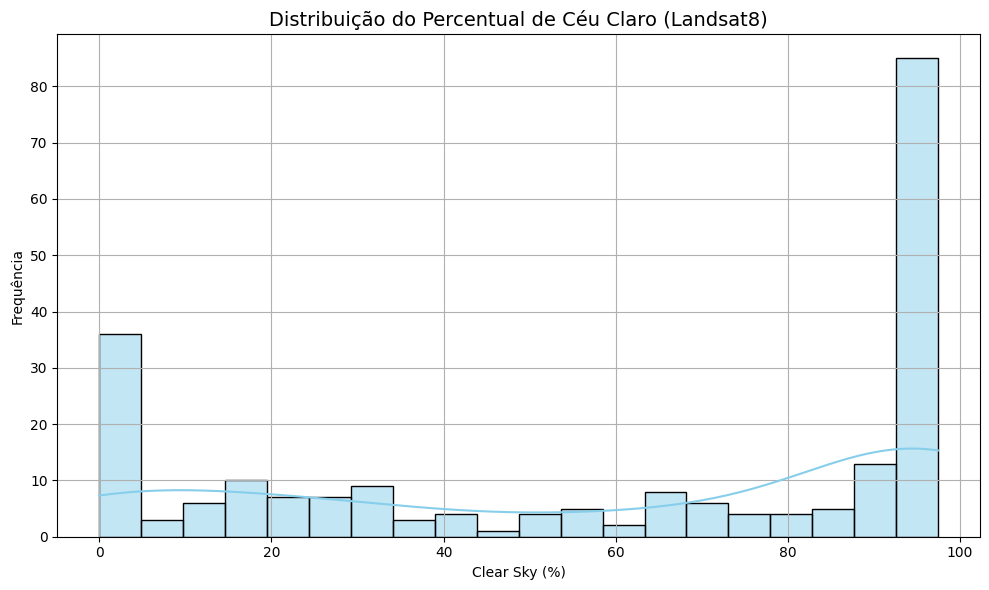

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove valores nulos ou NaN
df_plot = df_landsat.dropna(subset=['clear_sky_%'])

# Cria o histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_plot['clear_sky_%'], bins=20, kde=True, color='skyblue')

# Ajustes visuais
plt.title('Distribui√ß√£o do Percentual de C√©u Claro (Landsat8)', fontsize=14)
plt.xlabel('Clear Sky (%)')
plt.ylabel('Frequ√™ncia')
plt.grid(True)

# Exibe
plt.tight_layout()
plt.show()

Agora vamos obter o mesmo resultado para o sentinel. Veja que coloquei um range de datas aqui !

In [11]:
# Chamada da fun√ß√£o principal
df_sentinel = gee.list_sat_images(
    collection_id="COPERNICUS/S2_SR",
    roi=tijuca,
    max_imgs=500,
    compute_clear_sky=True,
    time_range=("2025-01-01", "2025-12-31")
)

Coletando metadados: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:22<00:00,  1.03it/s]


In [12]:
df_sentinel # e o resultado ...

id                    date  \
0   COPERNICUS/S2_SR/20250102T130249_20250102T1307... 2025-01-02 13:08:36.451   
1   COPERNICUS/S2_SR/20250112T130249_20250112T1302... 2025-01-12 13:08:35.975   
2   COPERNICUS/S2_SR/20250117T130241_20250117T1302... 2025-01-17 13:08:35.052   
3   COPERNICUS/S2_SR/20250122T130249_20250122T1305... 2025-01-22 13:08:37.798   
4   COPERNICUS/S2_SR/20250127T130311_20250127T1305... 2025-01-27 13:09:04.429   
5   COPERNICUS/S2_SR/20250201T130249_20250201T1302... 2025-02-01 13:08:39.033   
6   COPERNICUS/S2_SR/20250206T130311_20250206T1303... 2025-02-06 13:09:03.309   
7   COPERNICUS/S2_SR/20250211T130249_20250211T1302... 2025-02-11 13:08:39.929   
8   COPERNICUS/S2_SR/20250216T130311_20250216T1303... 2025-02-16 13:08:59.799   
9   COPERNICUS/S2_SR/20250221T130249_20250221T1302... 2025-02-21 13:08:41.056   
10  COPERNICUS/S2_SR/20250226T130311_20250226T1303... 2025-02-26 13:09:00.569   
11  COPERNICUS/S2_SR/20250303T130249_20250303T1302... 2025-03-03 13:08:39.643   
12  COPERNICUS/S2_SR/20250308T130311_20250308T1307... 2025-03-08 13:09:00.341   
13  COPERNICUS/S2_SR/20250313T130249_20250313T1302... 2025-03-13 13:08:38.032   
14  COPERNICUS/S2_SR/20250318T130311_20250318T1306... 2025-03-18 13:09:00.152   
15  COPERNICUS/S2_SR/20250323T130249_20250323T1302... 2025-03-23 13:08:39.530   
16  COPERNICUS/S2_SR/20250328T130311_20250328T1305... 2025-03-28 13:08:58.220   
17  COPERNICUS/S2_SR/20250402T130249_20250402T1302... 2025-04-02 13:08:35.563   
18  COPERNICUS/S2_SR/20250407T130311_20250407T1308... 2025-04-07 13:08:59.753   
19  COPERNICUS/S2_SR/20250409T130301_20250409T1307... 2025-04-09 13:08:49.638   
20  COPERNICUS/S2_SR/20250412T130249_20250412T1303... 2025-04-12 13:08:39.121   
21  COPERNICUS/S2_SR/20250417T130311_20250417T1303... 2025-04-17 13:08:56.954   
22  COPERNICUS/S2_SR/20250422T130249_20250422T1302... 2025-04-22 13:08:37.716   

      satellite  img_cloud_cover  solar_elevation  solar_azimuth  \
0   Sentinel-2B        15.732500        64.830587      94.905422   
1   Sentinel-2B        93.090373        63.685154      92.194494   
2   Sentinel-2A        29.836759        63.123120      90.321336   
3   Sentinel-2B        71.410829        62.578214      88.141344   
4   Sentinel-2C        97.216970        62.121361      85.641290   
5   Sentinel-2B        93.283498        61.455826      83.024154   
6   Sentinel-2C         6.063148        60.962321      80.088793   
7   Sentinel-2B        60.071480        60.263244      77.131532   
8   Sentinel-2C         0.261422        59.689003      73.922271   
9   Sentinel-2B        10.686066        58.925608      70.767505   
10  Sentinel-2C         1.162554        58.244940      67.431535   
11  Sentinel-2B         1.727758        57.361508      64.258979   
12  Sentinel-2C        10.440490        56.559904      60.948096   
13  Sentinel-2B        14.768787        55.551833      57.901622   
14  Sentinel-2C        27.812257        54.624846      54.754969   
15  Sentinel-2B        37.704194        53.503004      51.943245   
16  Sentinel-2C         3.826812        52.444405      49.097819   
17  Sentinel-2B         1.620877        51.220459      46.628808   
18  Sentinel-2C        46.808219        50.091923      44.116801   
19  Sentinel-2A        43.677410        49.580867      43.262456   
20  Sentinel-2B        10.228457        48.821498      42.019340   
21  Sentinel-2C        18.784247        47.637392      39.937163   
22  Sentinel-2B        93.819302        46.362282      38.240924   

    proportion_roi_%  clear_sky_%  
0              100.0    56.455451  
1              100.0     0.000000  
2              100.0    95.791462  
3              100.0    29.626495  
4              100.0     0.000000  
5              100.0     0.000408  
6              100.0   100.000000  
7              100.0     1.778152  
8              100.0   100.000000  
9              100.0    24.867410  
10             100.0    96.935424  
11             100.0    78.663202  
12   

In [13]:
# note que posso usar a fun√ß√£o de clear sky em uma imagem √∫nica !
img = ee.Image(df_sentinel.id[0])
clear_sky_target = gee.get_clear_sky_percentage(img,tijuca)

print(f'Percentual de C√©u Claro da imagem {df_sentinel.id[0]}: {clear_sky_target:.1f}%')

Percentual de C√©u Claro da imagem COPERNICUS/S2_SR/20250102T130249_20250102T130726_T23KPQ: 56.5%


In [14]:
# vamos criar um mapa para mostrar como essa imagem se apresenta
Map = geemap.Map()
Map.centerObject(tijuca, zoom=11)
Map.addLayer(img, {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}, 'RGB')
Map.addLayer(tijuca, {'color': 'blue'}, 'ROI Tijuca')
Map

Map(center=[-22.949512677160616, -43.28100173805031], controls=(WidgetControl(options=['position', 'transparen‚Ä¶

### Visualizando Nuvens em uma Imagem Landsat 8

Neste exemplo, selecionamos uma imagem do Landsat 8 que possui presen√ßa significativa de nuvens, com o objetivo de visualizar tanto a imagem original quanto a m√°scara de nuvens gerada a partir do atributo `QA_PIXEL`.

Os passos realizados s√£o:

- Selecionar uma imagem espec√≠fica da cole√ß√£o `LANDSAT/LC08/C02/T1_L2`.
- Visualizar a banda vermelha (`SR_B4`) em tons de cinza para facilitar a identifica√ß√£o visual.
- Criar uma m√°scara de nuvens utilizando o bit 3 da banda `QA_PIXEL`, que indica a presen√ßa de nuvens.
- Adicionar ao mapa a imagem original, a m√°scara de nuvens destacada em vermelho e o contorno da regi√£o de interesse (Floresta da Tijuca).


In [15]:
# Seleciona a imagem Landsat 8 que tem nuvens
img = ee.Image("LANDSAT/LC08/C02/T1_L2/LC08_217076_20180613")

# Seleciona uma banda vis√≠vel para visualiza√ß√£o em tons de cinza
gray_vis = {
    'bands': ['SR_B4'],  # Banda vermelha
    'min': 5000,
    'max': 16000,
    'gamma': 1.2
}

# Cria o mapa centrado na imagem
Map = geemap.Map()
Map.centerObject(tijuca, zoom=11)

# Adiciona a imagem original em escala de cinza
Map.addLayer(img, gray_vis, "Imagem em cinza (SR_B4)")

# Opcional: Adiciona a m√°scara de nuvem (QA_PIXEL bit 3)
cloud_mask = img.select('QA_PIXEL').bitwiseAnd(1 << 3).neq(0)
Map.addLayer(cloud_mask.updateMask(cloud_mask), {'palette': ['red']}, 'M√°scara de nuvem (QA_PIXEL)')
# Adiciona o contorno do ROI
Map.addLayer(tijuca, {'color': 'blue'}, 'Floresta da Tijuca')

Map

Map(center=[-22.949512677160616, -43.28100173805031], controls=(WidgetControl(options=['position', 'transparen‚Ä¶

In [16]:
# Carrega a imagem Sentinel-2 que tamb√©m tem nuvens
img = ee.Image("COPERNICUS/S2_SR/20181225T130249_20181225T130243_T23KPQ")

# Visualiza√ß√£o em tons de cinza (banda B4 - vermelho)
gray_vis = {
    'bands': ['B4'],  # Banda vermelha (10m)
    'min': 0,
    'max': 3000,
    'gamma': 1.2
}

# Cria m√°scara de nuvem com base na banda SCL
# C√≥digos 6, 7, 8, 9 representam diferentes tipos de nuvens
scl = img.select('SCL')
cloud_mask = scl.remap([6, 7, 8, 9], [1, 1, 1, 1], defaultValue=0).rename('cloud')
cloud_mask = cloud_mask.updateMask(cloud_mask)  # aplica m√°scara apenas onde h√° nuvem

# Cria o mapa
Map = geemap.Map()
Map.centerObject(tijuca, zoom=11)

# Adiciona a imagem em tons de cinza
Map.addLayer(img, gray_vis, "Imagem em cinza (B4 - Sentinel-2)")

# Adiciona a m√°scara de nuvem
Map.addLayer(cloud_mask, {'palette': ['red']}, 'M√°scara de Nuvem (SCL)')

# Adiciona a ROI
Map.addLayer(tijuca, {'color': 'blue'}, 'Floresta da Tijuca')

Map

Map(center=[-22.949512677160616, -43.28100173805031], controls=(WidgetControl(options=['position', 'transparen‚Ä¶

## An√°lise de S√©ries Temporais

Neste exemplo, vamos utilizar novamente a fun√ß√£o `list_sat_images` para buscar imagens e gerar uma s√©rie temporal de NDVI utilizando dados do Sentinel.

A ideia √© explorar o m√°ximo poss√≠vel da s√©rie hist√≥rica dispon√≠vel entre 2015 e 2025.  
Entretanto, √© importante observar que ao trabalhar com um volume muito grande de imagens (aproximadamente 466 imagens nesse caso), o uso intensivo do `googleapiclient` pode levar √† satura√ß√£o da conex√£o, gerando erros ou lentid√£o.

Por boas pr√°ticas, o ideal seria dividir a busca em intervalos menores (por exemplo, por ano ou por esta√ß√£o).  
No entanto, aqui o objetivo √© testar o desempenho e explorar toda a capacidade da cole√ß√£o de uma s√≥ vez.

Este teste tamb√©m ilustra a necessidade de estrat√©gias de otimiza√ß√£o para s√©ries temporais longas no Earth Engine. Note que a listagem das imagens demora em torno de **12 minutos** !!


In [17]:
df_sentinel = gee.list_sat_images(
    collection_id=ee.ImageCollection("COPERNICUS/S2_SR"),
    roi=tijuca,
    max_imgs=500,
    compute_clear_sky=True,
    time_range=("2015-01-01", "2025-12-31")
)

Coletando metadados: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 466/466 [07:16<00:00,  1.07it/s]


## Criando uma S√©rie Temporal do NDVI

Agora que j√° temos o `df_landsat` e `df_sentinel`, vamos criar uma s√©rie temporal utilizando a m√©dia e o desvio padr√£o do NDVI (√çndice de Vegeta√ß√£o por Diferen√ßa Normalizada).

Vamos usar a fun√ß√£o `index_to_timeseries`, que pode ser aplicada a qualquer √≠ndice dispon√≠vel no pacote [`eemont`](https://eemont.readthedocs.io/en/latest/). Recomendo dar uma olhada na documenta√ß√£o para conhecer todos os √≠ndices suportados!

> ‚ö†Ô∏è Aten√ß√£o: Se estiver trabalhando com conjuntos de dados muito grandes, essa opera√ß√£o pode demorar um pouco para ser conclu√≠da.


In [19]:
# Supondo que voc√™ j√° tenha carregado 'tijuca' como ee.Geometry !
df_ndvi_landsat = gee.index_to_timeseries(df_landsat, tijuca, index_name='NDVI', debug=False)
df_ndvi_sentinel = gee.index_to_timeseries(df_sentinel, tijuca, index_name='NDVI', debug=False)

Calculando NDVI na ROI: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 466/466 [06:35<00:00,  1.18it/s]


Verifique sempre o resultado !

In [20]:
df_ndvi_landsat.head() # verificando...

id                    date  \
0  LANDSAT/LC08/C02/T1_L2/LC08_216076_20130402 2013-04-02 12:49:49.261   
1  LANDSAT/LC08/C02/T1_L2/LC08_217076_20130412 2013-04-12 12:53:47.234   
2  LANDSAT/LC08/C02/T1_L2/LC08_217076_20130428 2013-04-28 12:53:45.720   
3  LANDSAT/LC08/C02/T1_L2/LC08_217076_20130514 2013-05-14 12:53:57.586   
4  LANDSAT/LC08/C02/T1_L2/LC08_217076_20130530 2013-05-30 12:54:03.240   

   satellite  img_cloud_cover  solar_elevation  solar_azimuth  \
0  LANDSAT_8            46.21        48.657075      50.825403   
1  LANDSAT_8            21.84        46.493006      46.144557   
2  LANDSAT_8            13.23        42.855143      40.326438   
3  LANDSAT_8             1.52        39.453768      36.513734   
4  LANDSAT_8            95.87        36.752248      34.559646   

   proportion_roi_%  clear_sky_%  NDVI_mean  NDVI_std  
0             100.0    17.512699   0.284645  0.073496  
1             100.0    96.958537   0.328675  0.079011  
2             100.0    95.084687   0.326340  0.092759  
3             100.0    97.379224   0.331219  0.097089  
4             100.0     0.000000   0.090646  0.047449

Vamos fazer um plot comparativo ..... Modifique para sua aplica√ß√£o

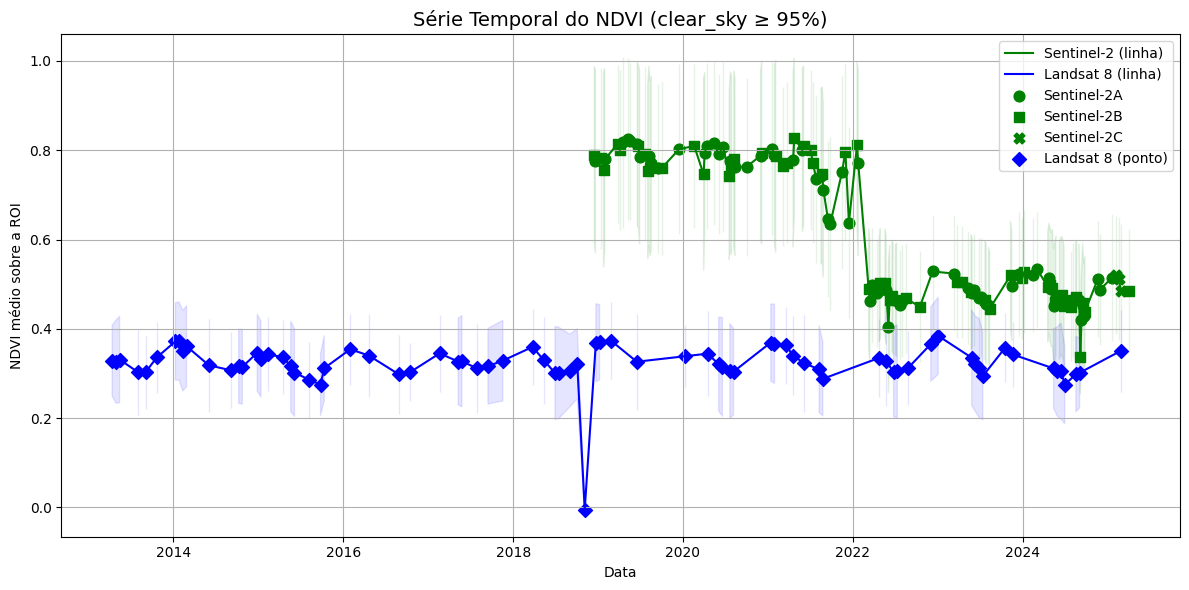

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ordena os DataFrames por data
df_ndvi_landsat = df_ndvi_landsat.sort_values("date")
df_ndvi_sentinel = df_ndvi_sentinel.sort_values("date")

# C√≥pias para o plot
df_ndvi_landsat_plot = df_ndvi_landsat.copy()
df_ndvi_sentinel_plot = df_ndvi_sentinel.copy()

# Filtro para visualiza√ß√£o: clear_sky_% < 95 ‚Üí NDVI_mean/std = NaN
df_ndvi_landsat_plot.loc[df_ndvi_landsat_plot['clear_sky_%'] < 95, ['NDVI_mean', 'NDVI_std']] = np.nan
df_ndvi_sentinel_plot.loc[df_ndvi_sentinel_plot['clear_sky_%'] < 95, ['NDVI_mean', 'NDVI_std']] = np.nan

# Inicia o gr√°fico
plt.figure(figsize=(12, 6))

# Faixa de std - Sentinel
plt.fill_between(
    df_ndvi_sentinel_plot['date'],
    df_ndvi_sentinel_plot['NDVI_mean'] - df_ndvi_sentinel_plot['NDVI_std'],
    df_ndvi_sentinel_plot['NDVI_mean'] + df_ndvi_sentinel_plot['NDVI_std'],
    color='green', alpha=0.1
)

# Faixa de std - Landsat
plt.fill_between(
    df_ndvi_landsat_plot['date'],
    df_ndvi_landsat_plot['NDVI_mean'] - df_ndvi_landsat_plot['NDVI_std'],
    df_ndvi_landsat_plot['NDVI_mean'] + df_ndvi_landsat_plot['NDVI_std'],
    color='blue', alpha=0.1
)

# Linha m√©dia do NDVI - Sentinel
sns.lineplot(
    data=df_ndvi_sentinel_plot,
    x='date', y='NDVI_mean',
    label='Sentinel-2 (linha)',
    color='green'
)

# Linha m√©dia do NDVI - Landsat
sns.lineplot(
    data=df_ndvi_landsat_plot,
    x='date', y='NDVI_mean',
    label='Landsat 8 (linha)',
    color='blue'
)

# ‚ñë‚ñë‚ñë Pontos sobre a curva Sentinel, diferenciando por sat√©lite ‚ñë‚ñë‚ñë
sentinel_symbols = {
    'Sentinel-2A': 'o',  # C√≠rculo
    'Sentinel-2B': 's',  # Quadrado
    'Sentinel-2C': 'X',  # X
}

for sat, marker in sentinel_symbols.items():
    subset = df_ndvi_sentinel_plot[df_ndvi_sentinel_plot['satellite'] == sat]
    plt.scatter(
        subset['date'], subset['NDVI_mean'],
        color='green', marker=marker, s=60, label=f'{sat}'
    )

# ‚ñë‚ñë‚ñë Pontos sobre a curva Landsat (inclusive onde NDVI_mean √© NaN) ‚ñë‚ñë‚ñë
plt.scatter(
    df_ndvi_landsat['date'],
    df_ndvi_landsat_plot['NDVI_mean'],  # usa os NaN filtrados
    color='blue', marker='D', s=50, label='Landsat 8 (ponto)'
)

# Ajustes visuais
plt.title('S√©rie Temporal do NDVI (clear_sky ‚â• 95%)', fontsize=14)
plt.xlabel('Data')
plt.ylabel('NDVI m√©dio sobre a ROI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Interpreta√ß√£o da S√©rie Temporal de NDVI - Landsat vs Sentinel-2

A figura acima apresenta a s√©rie temporal do NDVI m√©dio para duas plataformas de sat√©lites:
- **Landsat 8** (em azul)
- **Sentinel-2A/B/C** (em verde, com s√≠mbolos diferentes para cada sat√©lite)

√â poss√≠vel observar que o NDVI derivado do Sentinel-2 √© consistentemente mais alto do que o do Landsat 8 para a mesma regi√£o e per√≠odo de observa√ß√£o. As principais raz√µes para essa diferen√ßa incluem:

- **Resolu√ß√£o espacial**: Sentinel-2 possui resolu√ß√£o espacial mais fina (10 metros para a banda do NDVI), enquanto Landsat 8 opera em 30 metros. Isso permite que o Sentinel capture fei√ß√µes vegetadas menores que poderiam ser dilu√≠das na m√©dia dos pixels do Landsat.
- **Especificidade espectral**: As bandas do Sentinel-2 s√£o mais otimizadas para vegeta√ß√£o, especialmente no red-edge, o que melhora a sensibilidade a varia√ß√µes sutis no vigor da vegeta√ß√£o.
- **Frequ√™ncia de revisita**: O Sentinel-2 revisita a mesma √°rea com mais frequ√™ncia, reduzindo o risco de captar cenas sob condi√ß√µes at√≠picas (ex.: ap√≥s estresse h√≠drico ou eventos extremos).
- **Processamento atmosf√©rico**: As corre√ß√µes atmosf√©ricas aplicadas em cada miss√£o s√£o diferentes (ex.: Sen2Cor para Sentinel e LaSRC para Landsat), podendo introduzir pequenas diverg√™ncias nos valores de reflect√¢ncia de superf√≠cie.

Ainda assim, a queda abrupta no NDVI do Sentinel-2 observada a partir de 2022 pode estar relacionada a:

- **Mudan√ßa no sistema de observa√ß√£o**: Em 2022, o Sentinel-2C come√ßou a operar. Pequenas diferen√ßas de calibra√ß√£o entre sat√©lites (A, B e C) podem gerar mudan√ßas sistem√°ticas nos √≠ndices se n√£o forem devidamente harmonizadas.
- **Problemas na corre√ß√£o atmosf√©rica**: Varia√ß√µes na qualidade do produto atmosf√©rico (ex.: presen√ßa de aeross√≥is n√£o detectados) podem afetar a acur√°cia dos √≠ndices derivados.
- **Altera√ß√£o da √°rea analisada**: Caso a regi√£o de interesse (ROI) tenha sido modificada ou tenha sofrido mudan√ßa de uso do solo (ex.: urbaniza√ß√£o), o NDVI m√©dio tenderia a diminuir. Por√©m, isso n√£o explicaria porque o Landsat 8 se mant√©m est√°vel

> üîé Uma an√°lise complementar usando dados de precipita√ß√£o, √≠ndices de seca (ex.: SPI) ou imagens visuais da regi√£o poderia ajudar a confirmar a causa da mudan√ßa em 2022.



## Conclus√£o

Este notebook mostrou como trabalhar com o `geemap-tools`, listando e separando imagens, al√©m de construir uma an√°lise temporal do NDVI usando imagens Landsat e Sentinel-2, destacando diferen√ßas importantes entre as plataformas e evidenciando eventos de varia√ß√£o na cobertura vegetal ao longo do tempo.

A explora√ß√£o do NDVI √© apenas uma das muitas possibilidades! Com pequenas adapta√ß√µes, voc√™ pode aplicar o mesmo fluxo de trabalho para outros √≠ndices de vegeta√ß√£o, umidade do solo, detec√ß√£o de queimadas, entre muitos outros dispon√≠veis no pacote [`eemont`](https://eemont.readthedocs.io/en/latest/).

Fique √† vontade para experimentar, adaptar e expandir esse c√≥digo para suas necessidades.  
Se voc√™ desenvolver alguma fun√ß√£o extra ou melhoria interessante, sinta-se convidado(a) a interagir com o reposit√≥rio original e enviar um **Pull Request**!  
Ser√° um prazer receber suas contribui√ß√µes!

> üöÄ Ci√™ncia aberta se faz assim: colaborando e compartilhando!


[Andre L. Belem](mailto:andrebelem@id.uff.br)

